# Installations and Imports

In [ ]:
!pip install torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [16]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
#These are the tools that help to automatically handle text preprocessing and load pre-trained model for tasks like sentiment analysis

import torch #provides tools for deep learning
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Model Instance Creation

In [2]:
#creating instances of pre trained models
tokenizer= AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model= AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

# Sentiment calculation from Web-Scraped Data





In [29]:
import requests
from bs4 import BeautifulSoup

# URL of the Interstellar reviews page
url = "https://www.imdb.com/title/tt0816692/reviews"

# Send a request to the webpage
response = requests.get(url)

# Parse the page content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the review containers
review_containers = soup.find_all('div', class_='text show-more__control')

# Loop through the reviews and print them
for container in review_containers:
    reviews = [container.text for container in review_containers]


print(reviews)



['After watching this insane movie in the theatres back in 2014 I swore to god I will wait 5 years to watch it again so I get to forget it and experince the insanity it has again\nThis without doubt is THE BEST MOVIE EVER MADE', 'Sometimes I just need to see the start. Or end. Or a trailer. Or the music and theme from Hans Zimmer. Or the whole movie. Just to feel that thing, I only get from this movie. That the earth, space and time are something special, mystical. I never forget the first time I saw this movie, in an IMAX theatre in 2014. I was struck by it. Totally got me. And it stil does, 7 years later. This is the best movie ever made for me. Because of the feeling it gives me, no other movie can. So hard to get all of this emotion in only one movie. Brilliant.', "A lot has been said and written about Interstellar. You can obviously take apart any movie that is out there. You'll either love this one or you won't. I kind of would have loved to have watched this on an IMAX screen, t

In [30]:
df = pd.DataFrame(np.array(reviews),columns = ['review'])
df.head()

,review
0,After watching this insane movie in the theatr...
1,Sometimes I just need to see the start. Or end...
2,A lot has been said and written about Interste...
3,Interstellar is a movie like no other. Unlike ...
4,"This movie was the best written, acted, visual..."


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25 non-null     object
dtypes: object(1)
memory usage: 328.0+ bytes


In [32]:
'''
we create a function that takes review as an input and uses a pre-trained model to determine the sentiment score of the review.
The review texts are encoded using a tokenizer, after which they are passed throught the pretrained model for prediction.
The predicted sentiment score is returned as an integer, where higher values indicate positive sentiment and lower values indicate negative sentiment.
The model uses PyTorch for tensor operations and model inference.
'''

def sentiment_score(review):
    # Tokenize and encode the review
    encoding = tokenizer(review, return_tensors='pt', truncation=True, padding=True, max_length=512)

    # Pass the input through the model
    input_ids = encoding['input_ids']#input_ids are the tokens that represent the words in the input text after tokenization
    attention_mask = encoding['attention_mask']#tensor that indicates where tokens should be attended to and where not.
    outputs = model(input_ids, attention_mask=attention_mask)#instance of BertForSequenceClassification

    # Get the predicted sentiment score
    sentiment_score = int(torch.argmax(outputs.logits)) + 1

    return sentiment_score

In [34]:
sentiment_score(df["review"].iloc[0])

5

In [36]:
#here the review text is sliced to the first 512 characters, because BERT has a token limit of 512 tokens per input.
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [7]:
df.head(10)

,Review,sentiment
0,"My 3rd time watching this movie! Yet, it still...",5
1,I'd like to keep my review rather to the point...,3
2,You only get to watch this for the first time ...,5
3,"When you wake up from a good dream, you feel t...",3
4,"The 20th Century had Casablanca, Star Wars, th...",5
5,"Wait, did i just watch this or is it just a dr...",1
6,What is the most resilient parasite? An Idea! ...,2
7,I cannot ignore facts. I cannot ignore mistake...,1
8,"The central idea of ""Inception"" is an interest...",2
9,"When I first watch this movie, I was just shoc...",4


## EDA

In [37]:
import seaborn as sns

In [38]:
sentiment_label_mapping = {
    1: "very negative",
    2: "negative",
    3: "neutral",
    4: "positive",
    5: "very positive"
}

df['Label'] = df['sentiment'].map(sentiment_label_mapping)

df.head(10)

,review,sentiment,Label
0,After watching this insane movie in the theatr...,5,very positive
1,Sometimes I just need to see the start. Or end...,5,very positive
2,A lot has been said and written about Interste...,5,very positive
3,Interstellar is a movie like no other. Unlike ...,2,negative
4,"This movie was the best written, acted, visual...",5,very positive
5,Amongst the best movies of all time. The story...,5,very positive
6,I judge a movie by how long it takes me to rea...,5,very positive
7,I think just about everything has been said ab...,5,very positive
8,A science-fiction masterpiece. Nolan executes ...,5,very positive
9,I was extremely lucky to get the chance to see...,4,positive


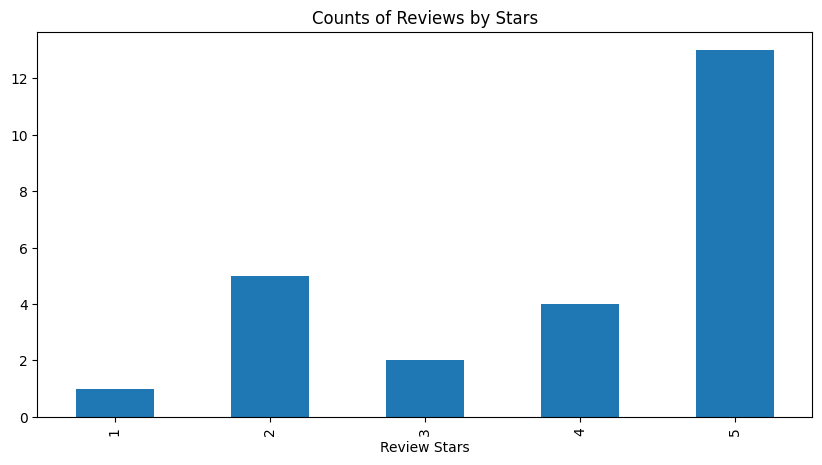

In [40]:
import matplotlib.pyplot as plt

ax = df['sentiment'].value_counts().sort_index().plot(kind = 'bar',
                                             title = 'Counts of Reviews by Stars',
                                             figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

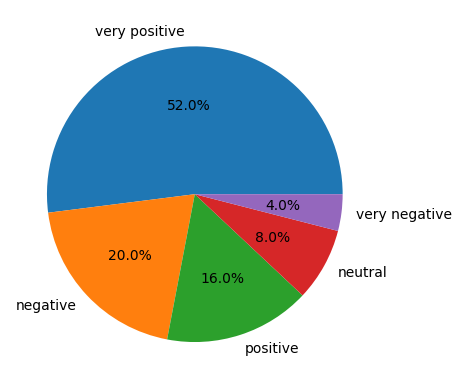

In [43]:
plt.pie(df['sentiment'].value_counts(),
        labels = df['Label'].unique(),
        autopct = '%1.1f%%')
plt.show()

# NLP

In [46]:
!pip install nltk

# **VADER(Valence Aware Dictionary and Sentiment Reasoner(Bag of words approach)**

In [49]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') #This lexicon is a dictionary containing words and their sentiment scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
sia = SentimentIntensityAnalyzer()

In [55]:
review_list= []

for container in review_containers:
    review_text = container.get_text(strip=True)
    scores = sia.polarity_scores(review_text)
    review_list.append({
        'review_text': review_text,
        'compound': scores['compound'],
        'positive': scores['pos'],
        'negative': scores['neg'],
        'neutral': scores['neu']
    })

# Convert the list of dictionaries into a pandas DataFrame
Vader = pd.DataFrame(review_list)

Vader.head()

,review_text,compound,positive,negative,neutral
0,After watching this insane movie in the theatr...,0.0398,0.169,0.166,0.665
1,Sometimes I just need to see the start. Or end...,0.8391,0.121,0.051,0.828
2,A lot has been said and written about Interste...,0.9827,0.150,0.029,0.821
3,Interstellar is a movie like no other. Unlike ...,0.9970,0.187,0.042,0.770
4,"This movie was the best written, acted, visual...",0.9812,0.221,0.042,0.738


In [56]:
Vader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_text  25 non-null     object 
 1   compound     25 non-null     float64
 2   positive     25 non-null     float64
 3   negative     25 non-null     float64
 4   neutral      25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [58]:
vaders = Vader.reset_index().rename(columns = {'index':'Id'})
df2= df.copy()

df2=df2.reset_index().rename(columns = {'index':'Id'})

vaders = vaders.merge(df2,on="Id",how = 'left')

vaders.head()

,Id,review_text,compound,positive,negative,neutral,review,sentiment,Label
0,0,After watching this insane movie in the theatr...,0.0398,0.169,0.166,0.665,After watching this insane movie in the theatr...,5,very positive
1,1,Sometimes I just need to see the start. Or end...,0.8391,0.121,0.051,0.828,Sometimes I just need to see the start. Or end...,5,very positive
2,2,A lot has been said and written about Interste...,0.9827,0.150,0.029,0.821,A lot has been said and written about Interste...,5,very positive
3,3,Interstellar is a movie like no other. Unlike ...,0.9970,0.187,0.042,0.770,Interstellar is a movie like no other. Unlike ...,2,negative
4,4,"This movie was the best written, acted, visual...",0.9812,0.221,0.042,0.738,"This movie was the best written, acted, visual...",5,very positive


In [59]:
vaders.drop("review", axis=1, inplace=True)

vaders.head(10)

,Id,review_text,compound,positive,negative,neutral,sentiment,Label
0,0,After watching this insane movie in the theatr...,0.0398,0.169,0.166,0.665,5,very positive
1,1,Sometimes I just need to see the start. Or end...,0.8391,0.121,0.051,0.828,5,very positive
2,2,A lot has been said and written about Interste...,0.9827,0.150,0.029,0.821,5,very positive
3,3,Interstellar is a movie like no other. Unlike ...,0.9970,0.187,0.042,0.770,2,negative
4,4,"This movie was the best written, acted, visual...",0.9812,0.221,0.042,0.738,5,very positive
5,5,Amongst the best movies of all time. The story...,0.8360,0.144,0.000,0.856,5,very positive
6,6,I judge a movie by how long it takes me to rea...,-0.6131,0.093,0.104,0.803,5,very positive
7,7,I think just about everything has been said ab...,0.9786,0.174,0.000,0.826,5,very positive
8,8,A science-fiction masterpiece. Nolan executes ...,0.9880,0.463,0.000,0.537,5,very positive
9,9,I was extremely lucky to get the chance to see...,0.9928,0.233,0.007,0.760,4,positive


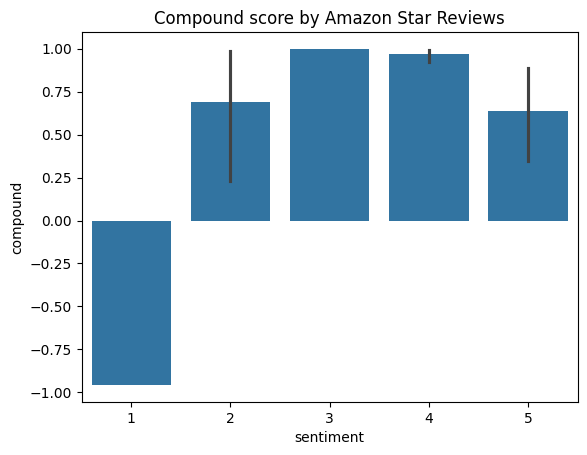

In [60]:
ax = sns.barplot(data = vaders, x = 'sentiment', y = 'compound')

ax.set_title('Compound score by Amazon Star Reviews')
plt.show()

<Axes: xlabel='sentiment', ylabel='positive'>

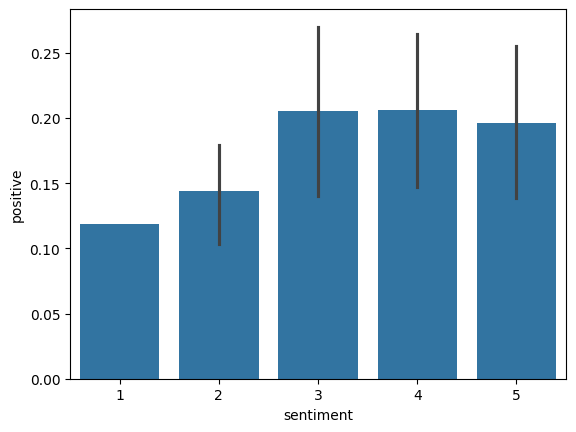

In [62]:
sns.barplot(data=vaders, x = 'sentiment', y = 'positive')

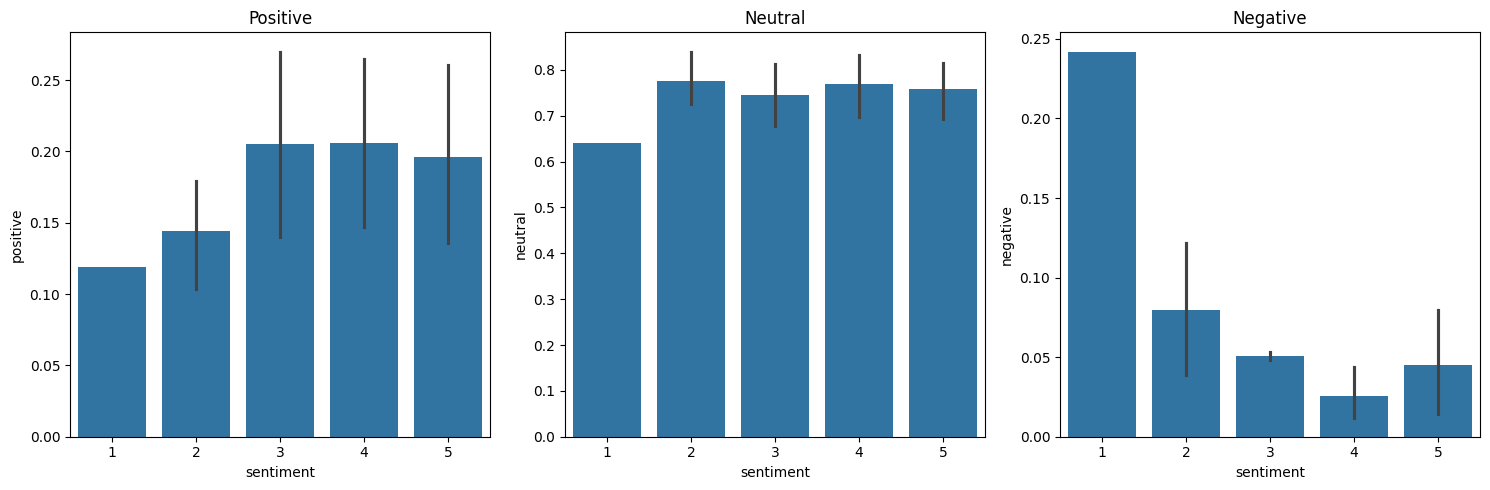

In [65]:
fig , axs = plt.subplots(1,3,figsize = (15,5))
sns.barplot(data = vaders, x='sentiment', y= 'positive', ax=axs[0])
sns.barplot(data = vaders, x='sentiment', y= 'neutral', ax=axs[1])
sns.barplot(data = vaders, x='sentiment', y= 'negative', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

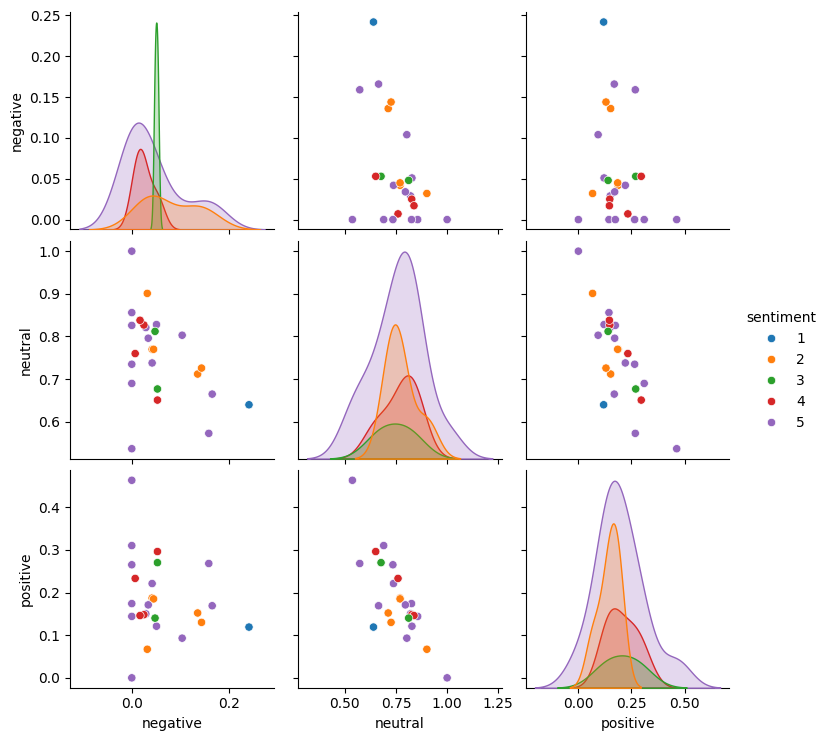

In [67]:
sns.pairplot(data=vaders,
             vars=['negative', 'neutral', 'positive'],
             hue='sentiment',
             palette = 'tab10')
plt.show()

# **TEXT BLOB**

In [69]:
from textblob import TextBlob

In [76]:
reviews_list = []

for container in review_containers:
    review_text = container.get_text(strip=True)

    blob = TextBlob(review_text)
    sentiment_score = blob.sentiment.polarity

    reviews_list.append({
        'review_text': review_text,
        'sentiment_score': sentiment_score
    })

txt_blob = pd.DataFrame(reviews_list)

txt_blob.head()

,review_text,sentiment_score
0,After watching this insane movie in the theatr...,0.000000
1,Sometimes I just need to see the start. Or end...,0.225271
2,A lot has been said and written about Interste...,0.216319
3,Interstellar is a movie like no other. Unlike ...,0.205454
4,"This movie was the best written, acted, visual...",0.379167


In [101]:
txt_blob = txt_blob.reset_index().rename(columns = {'index':'Id'})


df=df.reset_index().rename(columns = {'index':'Id'})

txt_blob = txt_blob.merge(df,on="Id",how = 'outer')

txt_blob.head()

,Id,review_text_x,sentiment_score_x,review_text_y,sentiment_score_y,review_text,sentiment_score
0,0,After watching this insane movie in the theatr...,0.000000,After watching this insane movie in the theatr...,0.000000,After watching this insane movie in the theatr...,0.000000
1,1,Sometimes I just need to see the start. Or end...,0.225271,Sometimes I just need to see the start. Or end...,0.225271,Sometimes I just need to see the start. Or end...,0.225271
2,2,A lot has been said and written about Interste...,0.216319,A lot has been said and written about Interste...,0.216319,A lot has been said and written about Interste...,0.216319
3,3,Interstellar is a movie like no other. Unlike ...,0.205454,Interstellar is a movie like no other. Unlike ...,0.205454,Interstellar is a movie like no other. Unlike ...,0.205454
4,4,"This movie was the best written, acted, visual...",0.379167,"This movie was the best written, acted, visual...",0.379167,"This movie was the best written, acted, visual...",0.379167


Here,
sentiment_score_x= Polarity

it is a float value within the range of -1(most negative) to 1(most positive).

sentiment_score_y=Subjectivity

it is a float within the range of 0(factual) to 1(very subjective).

In [104]:
txt_blob.drop(["review_text_y", "Id", 'review_text_x'], axis=1, inplace=True)

txt_blob.head(10)

,sentiment_score_x,sentiment_score_y,review_text,sentiment_score
0,0.000000,0.000000,After watching this insane movie in the theatr...,0.000000
1,0.225271,0.225271,Sometimes I just need to see the start. Or end...,0.225271
2,0.216319,0.216319,A lot has been said and written about Interste...,0.216319
3,0.205454,0.205454,Interstellar is a movie like no other. Unlike ...,0.205454
4,0.379167,0.379167,"This movie was the best written, acted, visual...",0.379167
5,0.360000,0.360000,Amongst the best movies of all time. The story...,0.360000
6,0.194271,0.194271,I judge a movie by how long it takes me to rea...,0.194271
7,0.154545,0.154545,I think just about everything has been said ab...,0.154545
8,0.525000,0.525000,A science-fiction masterpiece. Nolan executes ...,0.525000
9,0.230928,0.230928,I was extremely lucky to get the chance to see...,0.230928


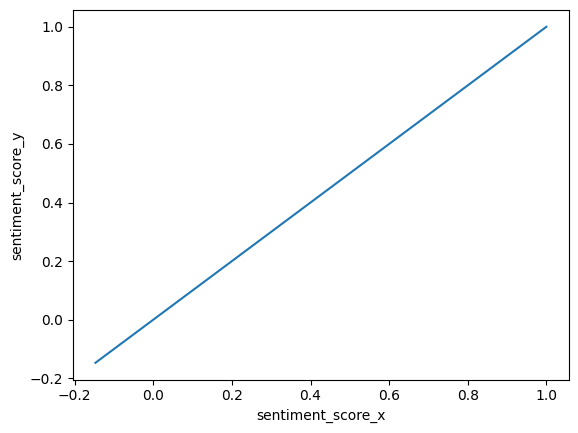

In [105]:
sns.lineplot(data = txt_blob, x = 'sentiment_score_x', y = 'sentiment_score_y')
plt.show()